### Random Forest Classification: Overview

Random Forest Classification is an ensemble learning method that constructs multiple decision trees during training and outputs the mode (most frequent class) of the individual trees' predictions. This method enhances the classification accuracy and controls overfitting compared to individual decision trees.

1. **Decision Trees**:
   - **Nodes and Splits**: The dataset is split into subsets based on the feature that results in the most homogeneous subsets concerning the target class.
   - **Splitting Criteria**: Common criteria include Gini impurity or entropy (information gain).
   - **Leaf Nodes**: The terminal nodes of a tree that contain the predicted class.

2. **Ensemble Learning**:
   - **Bootstrap Aggregating (Bagging)**: Random subsets of the original dataset are created with replacement (bootstrapping), and each subset is used to train a decision tree.
   - **Random Feature Selection**: At each split in the tree, a random subset of features is considered for splitting, which helps in making the trees less correlated.

3. **Aggregation**:
   - **Voting**: The final prediction of the random forest is obtained by taking the mode of the predictions from all the individual trees.

### Example Data: Government Public Domain

Let's consider an example where we predict whether a government department will get a high budget or low budget based on several factors.

#### Example Data
| Department | Budget Category | Staff Count | Projects Count | Avg Project Duration (months) |
|------------|------------------|-------------|----------------|------------------------------|
| Health     | High             | 2000        | 10             | 24                           |
| Education  | Low              | 1500        | 7              | 18                           |
| Defense    | High             | 5000        | 15             | 36                           |
| Transport  | High             | 3000        | 12             | 30                           |
| Agriculture| Low              | 1200        | 5              | 12                           |
| ...        | ...              | ...         | ...            | ...                          |

### Backend Math for Random Forest Classification

1. **Training Decision Trees**:
   - **Bootstrap Sample**: Randomly select subsets of data with replacement.
   - **Feature Subset**: Randomly select a subset of features for each split.
   - **Splitting**: Use Gini impurity or entropy to determine the best split.

2. **Prediction**:
   - **Individual Trees**: Each tree provides a predicted class.
   - **Aggregation**: Mode of the predictions of all the trees.

### Implementation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Generate logical synthetic dataset
np.random.seed(42)
num_samples = 100
staff_count = np.random.randint(500, 5000, num_samples)
projects_count = np.random.randint(1, 20, num_samples)
avg_project_duration = np.random.randint(6, 48, num_samples)

# Logical relationship: High budget if sum of weighted features exceeds a threshold
budget_threshold = 3500
budget_category = (staff_count * 0.5 + projects_count * 100 + avg_project_duration * 50) > budget_threshold
budget_category = np.where(budget_category, 'High', 'Low')

data = {
    'Department': np.random.choice(['Health', 'Education', 'Defense', 'Transport', 'Agriculture'], num_samples),
    'Staff Count': staff_count,
    'Projects Count': projects_count,
    'Avg Project Duration': avg_project_duration,
    'Budget Category': budget_category
}

In [3]:
# Create a DataFrame
df = pd.DataFrame(data)

In [4]:
# Features and target variable
X = df[['Staff Count', 'Projects Count', 'Avg Project Duration']]
y = df['Budget Category']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predictions
y_pred = rf.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.85
Confusion Matrix:
[[8 1]
 [2 9]]
Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.89      0.84         9
         Low       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



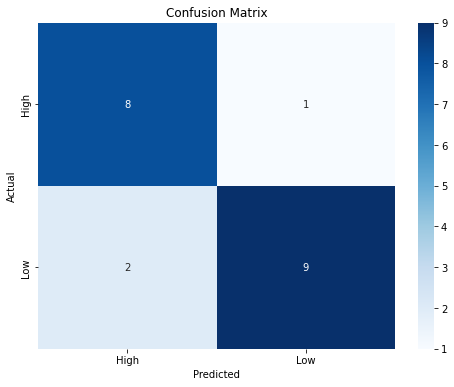

In [9]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()